In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

df = pd.read_csv('instagram_reach.csv')
df = df.drop(columns=['Unnamed: 0','S.No'], axis=1)
df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [2]:
df.shape

(100, 6)

In [3]:
df.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Caption            94 non-null     object
 2   Followers          100 non-null    int64 
 3   Hashtags           100 non-null    object
 4   Time since posted  100 non-null    object
 5   Likes              100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [5]:
df.isna().sum()

USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [6]:
# there are 6 nan values in the caption 

<Figure size 1500x400 with 0 Axes>

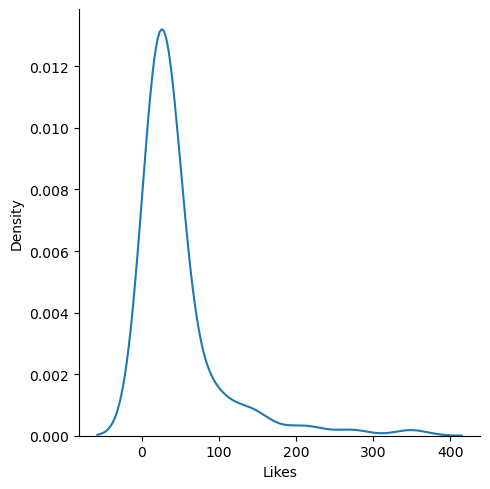

In [7]:
#distribution of likes 
plt.figure(figsize=(15,4))
sns.displot(data=df, x='Likes', kind="kde")
plt.show()

<Figure size 1500x400 with 0 Axes>

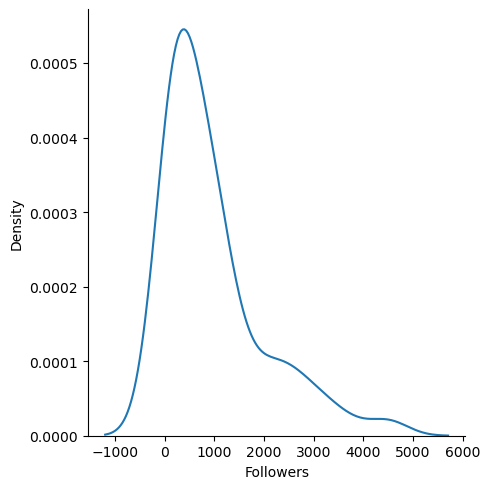

In [8]:
#distribution of followers
plt.figure(figsize=(15,4))
sns.displot(data=df, x='Followers', kind="kde")
plt.show()

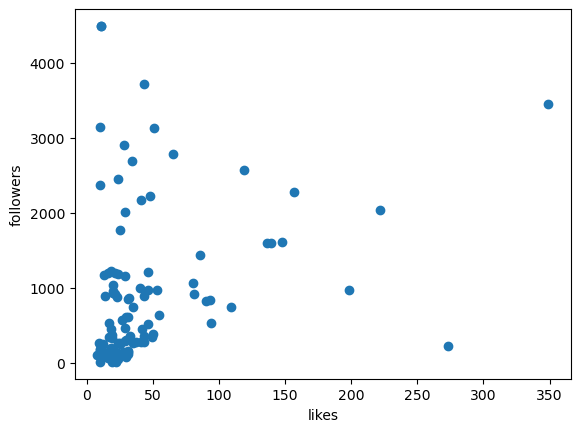

In [9]:
plt.scatter(data= df, x='Likes', y='Followers')
plt.xlabel('likes')
plt.ylabel('followers')
plt.show()

In [10]:
df.duplicated().sum() #there are no duplicates

0

In [11]:

def replace_non_alphanumeric(string):
    
    string = string.lower()
    
    pattern = re.compile('[\W_]+')  
    string = re.sub(pattern, ' ', string)

    string = set(string.split(' '))
    
    string = ' '.join(string).strip()
    
    return string.split(' ')

df['modified_hashtags'] = df['Hashtags'].apply(lambda x:replace_non_alphanumeric(x))

df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes,modified_hashtags
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139,"[ai, datascienc, dataanalytics, datalake, mach..."
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23,"[ai, robot, deck, tomorrowstechnology, compute..."
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25,"[ai, instabigdata, instateam, aitradingteam, t..."
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49,"[work, ai, softwareengineer, engineering, robo..."
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30,"[instabigdata, softwareengineer, artificiale, ..."


In [12]:
unique_list = {}

for elements in df['modified_hashtags']:
    for e in elements:
        if e not in unique_list:
            unique_list[e] = 1
        else:
            unique_list[e] += 1


unique_list = dict(sorted(unique_list.items(), key=lambda item: item[1], reverse=True))

unique_list = {key: value for key, value in unique_list.items() if value >= 10}
unique_list

{'machinelearning': 37,
 'artificialintelligence': 34,
 'ai': 26,
 'blockchain': 20,
 'startup': 20,
 'technology': 16,
 'tech': 16,
 'datascience': 15,
 'bigdata': 15,
 'development': 15,
 'product': 14,
 'iot': 12,
 'deeplearning': 11,
 'business': 11,
 'data': 10}

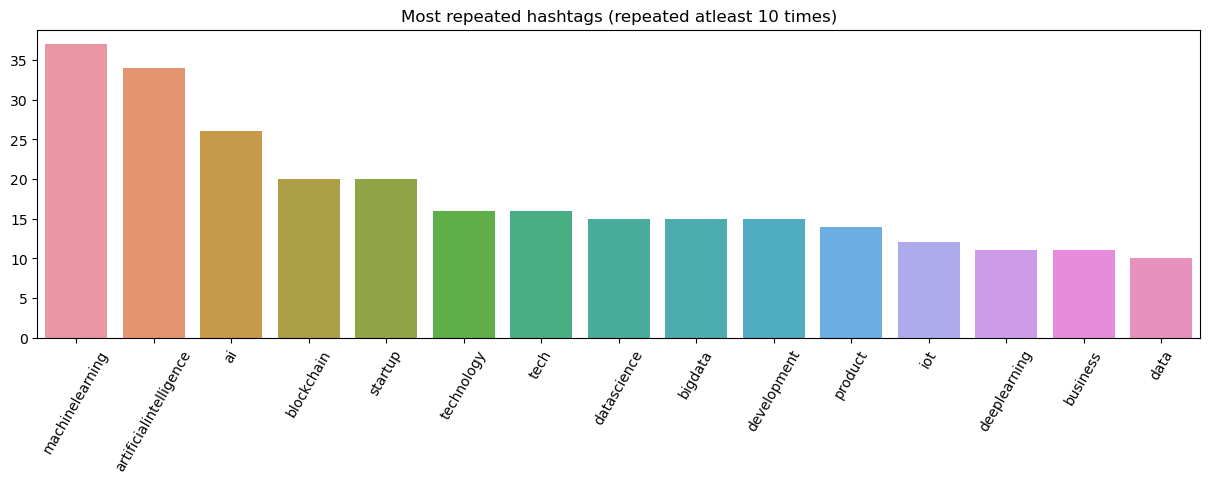

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

words = list(unique_list.keys())
frequencies = list(unique_list.values())

plt.figure(figsize=(15,4))
sns.barplot(x=words, y=frequencies)
plt.title('Most repeated hashtags (repeated atleast 10 times)')
plt.xticks(rotation=60)
plt.show()

In [14]:
#there are 922 words(hashtags) which are unique 
#there are 111 words which repeated twice and 62 words thrice

In [15]:
for col_names in unique_list:
    df[col_names] = 0

df['others'] = 0
df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes,modified_hashtags,machinelearning,artificialintelligence,ai,...,tech,datascience,bigdata,development,product,iot,deeplearning,business,data,others
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139,"[ai, datascienc, dataanalytics, datalake, mach...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23,"[ai, robot, deck, tomorrowstechnology, compute...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25,"[ai, instabigdata, instateam, aitradingteam, t...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49,"[work, ai, softwareengineer, engineering, robo...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30,"[instabigdata, softwareengineer, artificiale, ...",0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df['Time since posted'] = df['Time since posted'].str.extract('(\d+)', expand=False).astype(int)

In [17]:
for index, row in df.iterrows():
    keywords = row['modified_hashtags']
    keyword_counts = pd.Series(keywords).value_counts()
    existing_keywords = keyword_counts.index.intersection(unique_list)
    others_count = keyword_counts.loc[~keyword_counts.index.isin(unique_list)].sum()
    df.loc[index, existing_keywords] = keyword_counts[existing_keywords]
    df.at[index, 'others'] = others_count

In [18]:
X = df[['Followers','Time since posted','machinelearning','artificialintelligence', 'ai', 'blockchain', 'startup', 'technology', 'tech', 'datascience', 'bigdata', 'development', 'product', 'iot','deeplearning', 'business', 'data', 'others']]
y = df['Likes']

In [19]:
df.corr()

,Followers,Time since posted,Likes,machinelearning,artificialintelligence,ai,blockchain,startup,technology,tech,datascience,bigdata,development,product,iot,deeplearning,business,data,others
Followers,1.000000,0.251154,0.266218,0.209751,0.221387,0.085702,-2.516493e-02,4.637757e-02,0.100800,0.024956,0.059105,3.283864e-01,-0.113028,-0.032071,0.283376,0.163180,-0.022368,1.826377e-01,-0.109193
Time since posted,0.251154,1.000000,0.609888,0.300355,0.133499,0.115015,5.033111e-02,-1.273081e-01,0.029396,-0.035211,0.050578,1.334930e-01,-0.131835,-0.131741,0.068149,-0.010030,-0.114115,1.223737e-01,-0.072644
Likes,0.266218,0.609888,1.000000,0.080203,0.017208,-0.037634,7.133624e-02,-1.038116e-01,-0.053588,-0.031193,0.060190,2.231829e-01,-0.015431,-0.086084,-0.075659,-0.088211,-0.068386,1.618901e-01,-0.083825
machinelearning,0.209751,0.300355,0.080203,1.000000,0.324430,0.537364,-7.249314e-02,-1.242740e-01,0.230510,0.230510,0.432146,3.741394e-01,-0.205922,-0.309204,0.290644,0.458744,-0.004634,2.968767e-01,-0.281748
artificialintelligence,0.221387,0.133499,0.017208,0.324430,1.000000,0.440841,1.055501e-02,-1.477701e-01,0.320158,0.089828,0.171448,2.896874e-01,-0.301511,-0.289589,0.319611,0.219945,-0.049926,2.533202e-01,-0.245830
ai,0.085702,0.115015,-0.037634,0.537364,0.440841,1.000000,-1.139902e-02,-1.253892e-01,0.238797,0.114424,0.261774,2.617738e-01,-0.185157,-0.239158,0.412518,0.447378,0.083064,2.583778e-01,-0.225782
blockchain,-0.025165,0.050331,0.071336,-0.072493,0.010555,-0.011399,1.000000e+00,-1.250000e-01,0.054554,0.190941,-0.070014,1.400280e-01,-0.210042,-0.129688,0.046159,-0.015980,-0.175781,-2.949030e-17,0.026883
startup,0.046378,-0.127308,-0.103812,-0.124274,-0.147770,-0.125389,-1.250000e-01,1.000000e+00,-0.013639,0.122748,-0.070014,-1.943279e-17,-0.070014,-0.201737,-0.030773,-0.015980,0.463422,-8.333333e-02,0.090138
technology,0.100800,0.029396,-0.053588,0.230510,0.320158,0.238797,5.455447e-02,-1.363862e-02,1.000000,0.404762,0.198618,1.222265e-01,-0.183340,-0.176090,0.174595,0.108101,0.108101,3.091420e-01,0.074653
tech,0.024956,-0.035211,-0.031193,0.230510,0.089828,0.114424,1.909407e-01,1.227476e-01,0.404762,1.000000,0.198618,3.514011e-01,-0.183340,-0.176090,0.342475,0.195280,0.108101,1.272938e-01,-0.049002


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [22]:
df['Time since posted'].value_counts()


2     57
3     19
4     13
7      3
11     2
8      1
9      1
5      1
20     1
14     1
24     1
Name: Time since posted, dtype: int64

In [23]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [24]:
regression.predict(X_test)

array([ 36.33978001,  84.63142338,  17.81355134, -84.08701402,
        28.34384083,  56.30920999,  43.10673406,  26.2515589 ,
        60.87626821, 124.7531087 ,  38.57732991,  31.55171282,
        50.73234969,  39.40488497,  43.7564946 ,  64.08786481,
        30.7009742 ,  30.19490882,  89.85561924,  34.27653596])

In [25]:
import numpy as np

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)

    return mae, rmse, r2_square

In [26]:
### Train multiple models

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "support vector machine": SVR()
}


model_list = []
r2_list = []


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mae, train_rmse, train_rscore = evaluate_model(y_train, y_train_pred)
    test_mae, test_rmse, test_rscore = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(model)

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(train_mae))
    print("- R2 Score: {:.4f}".format(train_rscore))

    print('----------------------------------')
    
    print('Model performance for Test set')
    # print((y_test - y_test_pred))
    accuracy_score = (sum((y_test - y_test_pred) / y_test) / len(y_test)) * 100

    print("- Accuracy: {}".format(accuracy_score))
    print("- Root Mean Squared Error: {:.4f}".format(test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(test_mae))
    print("- R2 Score: {:.4f}".format(test_rscore))

    r2_list.append(test_rscore)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 38.7807
- Mean Absolute Error: 25.3095
- R2 Score: 0.5571
----------------------------------
Model performance for Test set
- Accuracy: -50.957761958460914
- Root Mean Squared Error: 40.8885
- Mean Absolute Error: 29.7452
- R2 Score: -0.1793


Lasso
Model performance for Training set
- Root Mean Squared Error: 41.0504
- Mean Absolute Error: 25.2861
- R2 Score: 0.5037
----------------------------------
Model performance for Test set
- Accuracy: -62.90376685156816
- Root Mean Squared Error: 27.9144
- Mean Absolute Error: 23.3554
- R2 Score: 0.4503


Ridge
Model performance for Training set
- Root Mean Squared Error: 39.3194
- Mean Absolute Error: 24.8085
- R2 Score: 0.5447
----------------------------------
Model performance for Test set
- Accuracy: -53.27134359150174
- Root Mean Squared Error: 32.5795
- Mean Absolute Error: 25.3277
- R2 Score: 0.2513


K-Neighbors Regressor
Model performance for Training set

In [27]:
#XGBRegressor performed better

# Model performance for Training set
# - Root Mean Squared Error: 0.0053
# - Mean Absolute Error: 0.0038
# - R2 Score: 1.0000
# ----------------------------------
# Model performance for Test set
# - Accuracy: -25.146646625961967
# - Root Mean Squared Error: 23.3414
# - Mean Absolute Error: 16.3444
# - R2 Score: 0.6157


In [28]:
# df.to_csv('modified_insta.csv')